# CE170A HW5: Sensor Data Analysis
Authors: Prof. Kenichi Soga, Renjie Wu, Shenghan Zhang, James Wang 

version 1.0

## Install Packages

In [ ]:
import os
!pip install trusspy
!wget "https://raw.githubusercontent.com/UCB-CE170a/Fall2020/master/homeworks/hw5/hw5.zip" -O hw5.zip
!unzip hw5.zip

## Background

There are two ways to understand a phenomena scientifically. One is through mathmatically modeling and computer simulation, which is the purpose of our assignment 1 (truss finite element simulation). The other is through experiments, which is performed in this class (model bridge loading experiment). By comparing experiment results with simulation results, one may appreciate the complexity of real world phenomena and have a deeper understanding of the power and limitations of the simulation method.

<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/overview.png" alt="Node numbering" width="600" />
    
    Figure 1. Simulation Vs. Experiment
</center>

In this assignment, you are going to analyze the sensor data from the model bridge experiment and compare the result with the truss simulation performed in assignment 1. The data you are going to explore are 
* Displacement data from displacement sensors (potentiometric measuring devices).
* Tilt data from WSN tilt motes. 
* Distributed (spatial) strain data from fiber optics sensors.



The typical workflow of data analysis is summarized in figure 2. 
<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/data_processing.png" alt="Node numbering" width="600" />
    
    Figure 2. Typical workflow of data analysis
</center>

We start with the raw data collected from the sensor systems. Then, we preprocess the raw data and store the cleaned data into a data storage system. There are various reasons for data preprocessing. Missing data handling, experiment/equipment setting adjustment and data format conversion are common reasons for it (there are more, of course). 

Most data can be represented as a single spread sheet, such as the displacement data and tilt data we are going to explore in this assignment. However, data can have complex structures in some cases, such as the distributed strain data we have in this case. The distributed strain data is collected from fiber optics sensors, which record the strain along the fiber (spatial component) during the experiment (time component). We deployed 50+ fiber optics sensors (with different lengths) across diffrent structure members to monitor load responses of the model bridge. To access data easily (We suppose you don't want to read-compare-visualize 50+ spreadsheets manually), we structured the data using the geometry of the model bridge. Ideally, it is best to use DataBase system to store the structured data. However, to simplify things, we use python dictionary to store the data in this assignment but the concept of data structuring is the same. 

Having the cleaned data on hands, we can perform various postprocessing techniques such as statistical analysis, and most importantly, visualize the data for interpretation.

The data are given in a format that follows the numbering given in the following figures.

Figure 3 shows the nodal numbering of the model bridge.
<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/figure1.png" alt="Node numbering" width="600" />
    
    Figure 3. Node numbering for the model bridge
</center>

## Data Exploration
### 1. Displacemenent data (potentiometric measuring devices) : load-displacement curves

Potentiometric measuring devices are used to measure the displacement of the TOP plate. Specifically, displacements for four corners of the top plate were recorded, shown by figure 4. Note the left corner (sensor 9) of the top plate point to the direction of corner A in Figure 3. 
<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/displacement.png" alt="Node numbering" width="600" />
    
    Figure 4. Potentiometric measuring devices record the displacement of the four corners of the top plate during the experiment. 
</center>

Lets read the processed data (base adjusted, unit converted, format changed) first:

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/load_displacement.csv')
df.head()

The plotting function is provided in this assignment. In the cell below, we give an example on how to use the function to plot load Vs. time. Note that the plot_lines function is capable on plotting multiple lines.

In [ ]:
import matplotlib.pyplot as plt

def plot_lines(xs,ys,xy_labels,line_lables):
    """ A multi-line plotter
     Args:
      xs: list of x values, i.e. [x1,x2,x3...]
      ys: list of y values, i.e. [y1,y2,y3...]
      xy_labels: labels for the figure, in the form of (x_label, y_label)
      line_lables: labels for plotted lines, must match to the order of yvalues in y

    Returns:
      ax: matplotlib axes 
    """
    assert len(xs)==len(ys), "number of x must equal to number of y"
    assert len(ys)==len(line_lables),  "ys and line_lables must be list with same shape, i.e. [y1],[y1_label]"
    
    fig = plt.figure()
    ax=fig.add_axes([0,0,1,1])
    
    for x,y in zip(xs,ys):
        l = ax.plot(x,y)
    ax.set_xlabel(xy_labels[0])
    ax.set_ylabel(xy_labels[1])
    ax.legend(labels = line_lables)
    return ax


# load the data to numpy array 
t = df['time(s)'].to_numpy()
load = df['load(N)'].to_numpy()
d9 = df['displacement9(m)'].to_numpy()
d10 = df['displacement10(m)'].to_numpy()
d11 = df['displacement11(m)'].to_numpy()
d12 = df['displacement12(m)'].to_numpy()

# Load Vs. time
plot_lines([t],[load],['time(s)','load(N)'],['load'])

What is the load threshold to fail the model bridge? What is the corresponding time of it?

<font color='red'>Answer: </font> 


Now its your turn, plot the load-displacement (load on y-axis, displacement on x-axis) curves measured at the top plate BEFORE the bridge fail (all four measurements in the same graph). Hint: your plot should be continuous as we ask for measurements BEFORE the bridge fail. 

In [ ]:
# TODO: Replace ? to your estimated fail time 
mask = t< ? # mask to get data before fail

plot_lines([d9[mask],d10[mask],d11[mask],d12[mask]],[load[mask]]*4,
           ['displacement(m)','load(N)'],['d9','d10','d11','d12'])

Next, plot the average of the measurements. 

In [ ]:
average = 

plot_lines()



Comment on the following (i) discuss a possible reason of having a kink at the early stage of loading in each load-displacement curve and (ii) comment on how the top plate moved during the load using the plot.

<font color='red'>Answer: </font> 


### 2. Tilt data (WSN tilt motes) : load-tilt curves

Lets explore the tilt data from WSN tilt motes. Figure 5 shows the location of WSN tilt motes and their numbering. The direction of positive angle is given for both longitudinal direction (L) and transverse direction (T).

<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/figure3.png" alt="Node numbering" width="600" />
    
    Figure 5. The locations of WSN tilt motes.Note tilt mote 3 and 4 sit on GH, IJ respectively. 
</center>

In [ ]:
# Load Logitudinal Tilt (right-left direction, "L direction" in Figure 5
tilt_long = pd.read_csv('./data/tilt_L_load.csv')
tilt_long.head()


In [ ]:
# Transverse Tilt (in-out direction, "T direction " in Figure 5)
tilt_tran = pd.read_csv('./data/tilt_T_load.csv')
tilt_tran.head()

Plot the longitudinal tilt-load curve (load on x-axis, tilt on y-axis) of the top using the tilt WNS mote data (Tilt 1) BEFORE the fail.

In [ ]:
load = 
theta1_long = 
theta1_trans = 

plot_lines()

Comment on how the top plate move during the load using the plots, does the result match your interpretation from the displacement data?

<font color='red'>Answer: </font> 


### 3. Strain data (fiber optics): load-strain curves
Finally, explore the most interesting data, distributed strain data collected from the fiber optics sensors. Figure 6 shows the location of the fiber optic sensors attached to each member of the bridge.

<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/figure2.png" alt="Node numbering" width="600" />
    
    Figure 6. The locations of fiber optic sensors
</center>

Model bridge memberes are divided into 4 planes: Bottom, Left-diagonal, Right-diagonal, and Middle plane. See figure 7. 

<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/figure1.png" alt="Node numbering" width="600" />
    
    Figure 7. Node numbering for the model bridge
</center>

As you probably noticed in quiz 1 and assignment 1, theoritically, the load will be distributed alone diagonal members (DH,HF,AG,GR,FJ,FC,EI,IB) and bottom members (AM,MB,DN,NC). Hence, we deployed TWO fiber optic sensors for each angle bar of such members (up and down in figure 8). Also, diagonal members of the model bridge have two angle bars wheras other members use one bar. We label the inner angle bar as "in" and the outside angle bar as "out". Again, two fiber optics sensors are used for each diagonal angle bar. In summary, diagonal members of the model bridge have four fiber optics sensors attached (two for each angle bar) and bottom members have two fiber optics sensors attached. Other members have only one fiber optics sensor attached. See figure 8 for 3d visualizations of sensor locations.
<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/fiber_loc.png" alt="Node numbering" width="600" />
    
    Figure 8. Fiber optics sensor locations on angle bars
</center>

Since we have 50+ fiber optics sensors, strain data are grouped into different categroies based on their deployed locations in the bridge. All the data is stored in the STRAIN_DATA dictionary. It is structured into four levels: the first level is plane. For each plane, we have truss members. Each member have many fiber optics sensors installed, which is grouped into the fiber level. At the end, we can reach the data level, which contains loads (N elements), locations (M elements), and strain measurements (N*M elements) of the corresponding sensor. See figure 9 for the structure of this data. 
<center>
<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/sensor_data.png" alt="Node numbering" width="600" />
    
    Figure 9. Structure of the sensor data
</center>



Run cell below to define constant and construct the STRAIN_DATA from data files. 

In [ ]:
# Construct the strain data 
from scripts.utils import construct_strain_data

PLANE_NAMES = ['bottom','diagonal_left','diagonal_right','middle']

BOTTOM_MEMBERS = ['AD','AM','BC','DN','MB','NC']
DL_MEMBERS = ['AG','DG','DH','GE','GH','HE','HF']
DR_MEMBERS = ['BI','BJ','CJ','IE','IF','JF','JI']
MID_MEMBERS = ['GM','HN','MI','NJ']

PLANE2MEMBERS = {'bottom':BOTTOM_MEMBERS,
               'diagonal_left':DL_MEMBERS,
               'diagonal_right':DR_MEMBERS,
               'middle':MID_MEMBERS}

time = df['time(s)'].to_numpy()
load = df['load(N)'].to_numpy()

T2LOAD = {}
for i,t in enumerate(time):
    T2LOAD[round(t,2)] = load[i]

STRAIN_DATA = construct_strain_data(T2LOAD)

Cell below shows one example on fetching the strain data from the fiber optics sensor attached "up" on "inner" angle bar of memeber AG (see figure 8), located on the diagonal_left (DL) plane (see figure 7 and constant defined in above cell): 

In [ ]:
AG_in_up = STRAIN_DATA['diagonal_left']['AG']['in_up']
strain_data = AG_in_up['strain(micro)']
data_location = AG_in_up['loc'] #match columns in strain_data
corresponding_loads = AG_in_up['load']#match rows in strain_data

load1 = corresponding_loads[1500]
load2 = corresponding_loads[2000]
plot_lines([data_location]*2,[strain_data[1500,:],strain_data[2000,:]],
           ['location(mm)','micro strain'],[f'load at {load1}N',f'load at {load2}N'])

For each member, take the average of the fiber optic strain data at the mid-point of the member at different times (loads). To do that, fill the TODO parts in function "get_plane_strains". Then plot the load-strain curve for each member.

In [ ]:
def average_member_strains(member_data):
  """ Function that compute the average of the fiber optic strain data 
  at the mid-point of the member at different times"""
    mid_data_list = []
    for fib_name, fib_data in member_data.items():
        strain = fib_data['strain(micro)']
        num_loc = strain.shape[1]-1
        mid_loc = int(num_loc/2+1)
        mid_data_list.append(strain[:,mid_loc])
        
    mid_data_list = np.array(mid_data_list)
    strain_ave = np.mean(mid_data_list,axis = 0)
    return strain_ave

        
def get_plane_loads(plane_name):
  """Function that provide list of loads (in KN) for members in a plane"""
    assert plane_name in PLANE_NAMES, "plane name must be the name from PLANE_NAMES"
    plane_members = PLANE2MEMBERS[plane_name]
    plane_data = STRAIN_DATA[plane_name]
    
    loads = []
    for member in plane_members:
        member_data = plane_data[member]
        for fib_name, fib_data in member_data.items():
            load = fib_data['load']
        loads.append(load)
    return np.array(loads)/1000 

def get_plane_strains(plane_name):
  """Function that provide list of averaged strains for members in a plane"""
    assert plane_name in PLANE_NAMES, "plane name must be the name from PLANE_NAMES"
    plane_members = PLANE2MEMBERS[plane_name]
    plane_data = STRAIN_DATA[plane_name]
    
    member_strains = []
    for member in plane_members:
        # TODO: fetch the member data and call the right function (given to you)
        member_data = 
        ave_strain = 
        member_strains.append(ave_strain)
    return np.array(member_strains)
    
    

    
    

Use "subplot_lines" function below to make plots this time (same interface as the plot_lines function). 

In [ ]:
def subplot_lines(xs,ys,xy_labels,line_lables):
    """Subplot function 
     Args:
      xs: list of x values, i.e. [x1,x2,x3...]
      ys: list of y values, i.e. [y1,y2,y3...]
      xy_labels: labels for the figure, in the form of (x_label, y_label)
      line_lables: labels for plotted lines, must match to the order of yvalues in y
    Returns:
        None
    """
    assert len(ys)==len(line_lables),  "ys and line_lables must be list with same shape, i.e. [y1],[y1_label]"
    
    fig, axes = plt.subplots(1, len(ys),figsize=(18,9))
    
    for ax, x, y,label in zip(axes,xs,ys,line_lables): 
        l = ax.plot(x,y,label =label)
        ax.legend()
        
        
    # add a big axes, hide frame
    ax = fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax.grid(False)
    ax.set_xlabel(xy_labels[0])
    ax.set_ylabel(xy_labels[1])
    ax.legend(labels = line_lables)



Bottom Members

In [ ]:
plane_name = 
loads = 
strains = 

subplot_lines(strains,loads,['micro strain','Load (kN)'],BOTTOM_MEMBERS)

Left-diagnal members

In [ ]:
plane_name =
loads = 
strains = 

subplot_lines(strains,loads,['micro strain','Load (kN)'],DL_MEMBERS)

Right-diagnal members

In [ ]:
plane_name = 
loads = 
strains = 

subplot_lines(strains,loads,['micro strain','Load (kN)'],DR_MEMBERS)

Middle members 

In [ ]:
plane_name = 
loads = 
strains = 


subplot_lines(strains,loads,['micro strain','Load (kN)'],MID_MEMBERS)

Confirm that the strains are very small for the members that you are expected to have zero load in your FE calculation. Comment on the results.

<font color='red'>Answer: </font> 


## Data Analysis
### 4. Material stiffness (Young's modulus) revision using load-strain curves

Use the plot of Q3 to revise the stiffness of the material in your FE model. Hint: "load" from data is the system (total) load, go back to quiz 1 to find the equation to convert total load to the load felt by each member. Again, pay attention to number of angle bars for each member. Your answer should have same magnitude to the value you have in assignment 1.

<font color='red'>Answer: </font> 


Compare the computed load-displacement (estimate from quiz 1 result) at the top node to the measured load-displacement curves. Why they are different? 

<font color='red'>Answer: </font> 

### 5. Simulation Vs. measurements: Rotation

Plot the load-tilt curves (tilt for the y-axis, load for the x-axis) of the diagonal compressive members (tilt motes 5,6,7,8) from the tilt WSN motes BEFORE the fail (use the plot_lines function this time). Only plot data on the logitudinal direction this time. 

In [ ]:
load = 
theta5 = 
theta6 = 
theta7 = 
theta8 = 

plot_lines()

Run trusspy simulation again. Unlike assignment 1, this time we provide the funcion to create the truss model (same configuration as assignment 1). Use your estimated new youngs modulus as the input for the "create_truss_model" to create trusspy model as you did in assignment 1. 

In [ ]:
from scripts.utils import create_truss_model

DESIGN_LOAD = 7000
#TODO: Fill your estimated value
youngs_modulus = 
truss_model = create_truss_model(youngs_modulus)

Compare the sensor results to your FE model results (after the stiffness has been updated) by plotting the simulated rotation degrees of the corresponding members (provided below, same as assignment 1). Comment on the results. 

In [ ]:
from scripts.utils import get_rotation_degrees

lpf,thetas= get_rotation_degrees(truss_model,3)
load = lpf*DESIGN_LOAD

plt.plot(load,thetas,label='Bottom Diagnal Member Rotation')
plt.xlim(0,17000)
plt.ylim(0,0.12)
plt.xlabel('load(N)')
plt.ylabel('Rotation/degree')
plt.legend()



<font color='red'>Answer: </font> 

### 6. Strain data interpretation: Bending 

Pick the data at 7000N and plot strain versus locations for diagonal member CJ. 



In [ ]:
def find_load_idx(loads,desired_load):
  """Get the desired load list index"""
    min_diff = 999999
    idx = 0
    for i, load in enumerate(loads):
        diff = abs(load-desired_load)
        if diff < min_diff:
                min_diff = diff
                idx = i
    return idx 
        
def get_strain(member_data,fiber_name,desired_load = 7000):
  """Get the strain data for a fiber"""
    fiber_data = member_data[fiber_name]
    loads = fiber_data['load']
    idx = find_load_idx(loads,desired_load)
    strain_data = fiber_data['strain(micro)']
    strain = strain_data[idx,:]
    return strain

def get_location(member_data,fiber_name):
  """Get the location data for a fiber"""
    fiber_data = member_data[fiber_name]
    location = fiber_data['loc']
    return location

In [ ]:
LD_data = STRAIN_DATA['diagonal_right']
member_data = LD_data['CJ']
fiber_names = member_data.keys()

locations= []
strains = []

# TODO: Call the right function and make the plot
for fiber_name in fiber_names:
    loc = 
    locations.append(loc)
    strain = 
    strains.append(strain)

plot_lines()

Two different angle bar bending patterns from finite element (FE) analysis are shown in figures below (each pattern has two directions): 

<center>

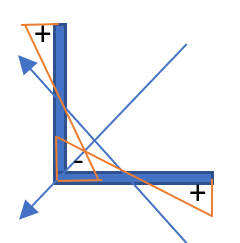

<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/type1_b.png" alt="Node numbering" width="600" />
    
    Figure 10. Type 1 angle bar bending (one direction) 
</center>

<center>

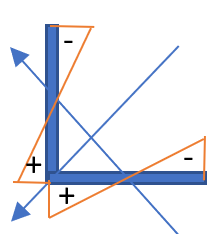

<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/type1_a.png" alt="Node numbering" width="600" />
    
    Figure 11. Type 1 angle bar bending (the other direction)
</center>

<center>

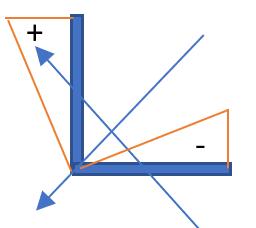

<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/type2_a.png" alt="Node numbering" width="600" />
    
    Figure 12. Type 2 angle bar bending 
</center>

<center>

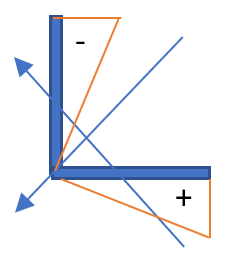

<img src="https://github.com/UCB-CE170a/Fall2020/raw/master/homeworks/hw5/figures/type2_b.png" alt="Node numbering" width="600" />
    
    Figure 13. Type 2 angle bar bending (the other direction)
</center>

By examining the variation in strains across a given cross-section, one can find out that our sensor deployment strategy is capable on detecting bending type 2 but not type 1:

The position of the centroid of the angle (Figure 14) can be calculated as:
$\overline{x}=\frac{Lt(L/2+t)+(Lt^2)/2+t^3/2}{2Lt+t^2}$
For the angle used in experiment, we have $L=12.7$ mm, $t=0.79$ mm. 
We then have $\overline{x}=\overline{y}=3.67$ mm. 

Crossing the centroid, we have two principle axes, $u$ and $v$ (Figure 15). Bending with respect to the two principle axes are independent. 

Figure 16 shows the strain distribution caused by bending with regard to axis $u$. We have the “crossing point” between u axis and the angle (zero strain point): 

$\sqrt{2}\overline{x}=5.19$ mm

which is quite close to the fiber location:  $L/2±2=[4.35,8.35]$ mm. This suggests that the current fiber location (middle of the angle) is not be able to used to calculate/reflect the bending with regard to $u$ axis (i.e., the current fiber location cannot detect type 1 bending in Figure 10 and Figure 11). 

Figure 16 shows the strain distribution caused by bending with regard to axis $v$.Based on the fiber positions (illustrated by the red and green circles in Figure 16), we can calculate the rotation of each cross section. By further integration, we can calculate the bending shape.  

Qualitatively, if we observed more tension in the red fiber compared to the green fiber, the angle would move transversely (bend) in the direction of $u$ (type 2 bending, Figure 12 or Figure 13). 

<center>

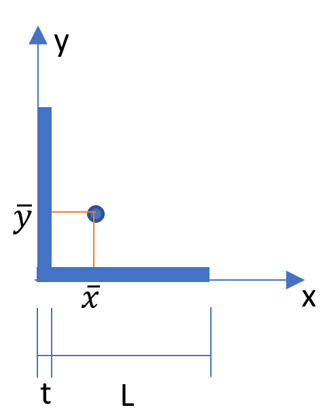

Figure 14: Location of the centroid.
</center>

<center>

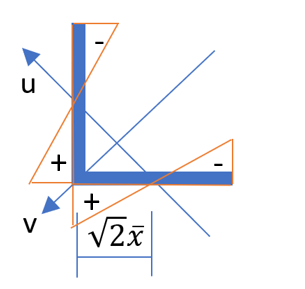

Figure 15: Strain caused by bending with respect to principal axis u (causing bending 1).
</center>

<center>

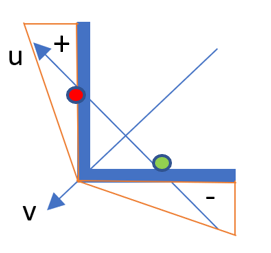

Figure 16: Strain caused by bending with respect to principal axis v (causing bending 2).
</center>



Assuming the red circle in Figure 16 represents the "up" fiber, and the green circle represents the "down" fiber. Comment which direction (posititive, figure 12, or negative, figure 13) the two angle bars (in & out) of member CJ bend to. Please select strain near the middle region to avoid the strain transferring regions at the two ends (-50 to 50 mm). 

Hint: compression (-) and tension (+) are relative to each other (i.e. if strain measurement from fiber 1 is bigger than fiber 2, then fiber 1 is in tension and fiber 2 is in compression) . 

<font color='red'>Answer: </font> :  




BONUS POINT question: choose another member and perform bending analysis on it.

<font color='red'>Answer: </font> 


### 7. Summary

If you are asked to improve your FE (truss simulation) model, what would you do? 

<font color='red'>Answer: </font> 
